<a href="https://colab.research.google.com/github/malikmk/MachineLearning/blob/master/GoogleCoLabWork/MNIST_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A first tryout of MNIST on Google Colab**




*STEP 1: Header files for the Keras implementation of MNIST recognition. *




In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 10


In [0]:
#Image dimensions
img_x,img_y = 28,28


In [4]:
#Loading MNIST data set. It is already splitted into train and test. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Construction of 4D Tensor (sample#, x_img_x, img_y, numOfChannels)
# Only one channel in greyscale images, in MNIST dataset. 

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test  = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [0]:
# convert to right type of data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [7]:
print ('x_train shape is:', x_train.shape)


x_train shape is: (60000, 28, 28, 1)


In [8]:
print (x_train.shape[0], 'train samples')

60000 train samples


In [9]:
print(x_test.shape[0], 'test samples')

10000 test samples


In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()

W0827 05:54:17.617838 140270168577920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [12]:
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1),
                activation='relu',
                input_shape=input_shape))

W0827 05:54:18.996284 140270168577920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 05:54:19.009748 140270168577920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


W0827 05:54:21.258783 140270168577920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

W0827 05:54:22.131894 140270168577920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 05:54:22.143692 140270168577920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [0]:
history = AccuracyHistory()

In [17]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

W0827 05:54:33.394656 140270168577920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0827 05:54:33.471305 140270168577920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1487 - acc: 0.9536 - val_loss: 0.0486 - val_acc: 0.9839
Epoch 2/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0411 - acc: 0.9872 - val_loss: 0.0317 - val_acc: 0.9898
Epoch 3/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0275 - acc: 0.9913 - val_loss: 0.0336 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0297 - val_acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0167 - acc: 0.9948 - val_loss: 0.0272 - val_acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.0299 - val_acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0109 - acc: 0.9962 - val_loss: 0.0360 - val_acc

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03302136222493587
Test accuracy: 0.9916


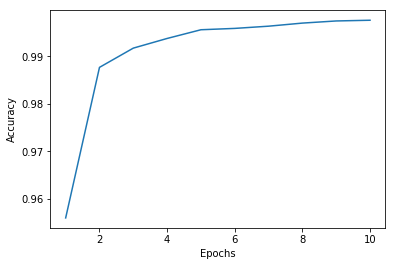

In [20]:
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

**Training Results while using no accelerator.**Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1553 - acc: 0.9528 - val_loss: 0.0483 - val_acc: 0.9846
Epoch 2/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0401 - acc: 0.9874 - val_loss: 0.0298 - val_acc: 0.9905
Epoch 3/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0259 - acc: 0.9919 - val_loss: 0.0385 - val_acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0204 - acc: 0.9934 - val_loss: 0.0246 - val_acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0154 - acc: 0.9952 - val_loss: 0.0244 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0116 - acc: 0.9963 - val_loss: 0.0271 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0104 - acc: 0.9967 - val_loss: 0.0243 - val_acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0290 - val_acc: 0.9920
Epoch 9/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0289 - val_acc: 0.9924
Epoch 10/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0312 - val_acc: 0.9913

**Training Results while using GPU Runtime setting in Colab.**
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1459 - acc: 0.9560 - val_loss: 0.0431 - val_acc: 0.9862
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0401 - acc: 0.9877 - val_loss: 0.0289 - val_acc: 0.9910
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0267 - acc: 0.9917 - val_loss: 0.0256 - val_acc: 0.9926
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0313 - val_acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0141 - acc: 0.9956 - val_loss: 0.0275 - val_acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0131 - acc: 0.9959 - val_loss: 0.0310 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0115 - acc: 0.9964 - val_loss: 0.0242 - val_acc: 0.9926
Epoch 8/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0086 - acc: 0.9970 - val_loss: 0.0249 - val_acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0077 - acc: 0.9975 - val_loss: 0.0268 - val_acc: 0.9921
Epoch 10/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.0330 - val_acc: 0.9916

**Training Results while using TPU Runtime setting in Colab.**
